In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

# Lab 5: Transformations and SQL

### Objective
In this lab you will get some practice plotting and applying data transformations, as well as a preview of kernel density estimators (KDEs).  We will be working with data from the World Bank containing various statistics for countries and territories around the world. 

**This assignment should be completed and submitted by 11:59 PM PDT on Tuesday, September 28th, 2021.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** in the following cell:

*List collaborators here*

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ds100_utils
import sqlalchemy
from pathlib import Path

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

## Loading Data

Let us load some World Bank data into a `pd.DataFrame` object named ```wb```.

In [3]:
wb = pd.read_csv("data/world_bank_misc.csv", index_col=0)
wb.head()

,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015,Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
Afghanistan,NaN,NaN,NaN,NaN,62.0,32.0,45.0,18.0,NaN,NaN,...,21.0,32.0,68.0,78.0,62.0,41.0,4.6,11.8,87.0,58.0
Albania,108.0,105.0,97.0,97.0,99.0,99.0,98.0,96.0,26.0,7.0,...,78.0,93.0,98.0,98.0,70.0,63.0,NaN,NaN,88.0,76.0
Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,51.0,11.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.0,100.0,96.0,97.0,NaN,NaN,NaN,NaN,83.0,87.0


This table contains some interesting columns.  Take a look:

In [4]:
list(wb.columns)

['Primary completion rate: Male: % of relevant age group: 2015',
 'Primary completion rate: Female: % of relevant age group: 2015',
 'Lower secondary completion rate: Male: % of relevant age group: 2015',
 'Lower secondary completion rate: Female: % of relevant age group: 2015',
 'Youth literacy rate: Male: % of ages 15-24: 2005-14',
 'Youth literacy rate: Female: % of ages 15-24: 2005-14',
 'Adult literacy rate: Male: % ages 15 and older: 2005-14',
 'Adult literacy rate: Female: % ages 15 and older: 2005-14',
 'Students at lowest proficiency on PISA: Mathematics: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Reading: % of 15 year-olds: 2015',
 'Students at lowest proficiency on PISA: Science: % of 15 year-olds: 2015',
 'Population: millions: 2016',
 'Surface area: sq. km thousands: 2016',
 'Population density: people per sq. km: 2016',
 'Gross national income, Atlas method: $ billions: 2016',
 'Gross national income per capita, Atlas method: $: 2016',
 'Purchasin

# Part 1: Scaling

In the first part of this assignment we will look at the distribution of values for child measles immunization rate as well as the gross national income per capita. The code below creates a copy of the DataFrame that contains only the two Series we want, and then drops all rows that contain null values in either column.

**Note:** For this lab we are dropping null values without investigating them further. However, this is generally not the best practice and can severely affect our analyses.

See the seaborn documentation on [distributions](https://seaborn.pydata.org/tutorial/distributions.html) and [functions](https://seaborn.pydata.org/tutorial/function_overview.html) for more details.

In [5]:
#creates a DataFrame with the appropriate index
df = pd.DataFrame(index=wb.index)

#copies the Series we want
df['imm'] = wb['Child immunization rate: Measles: % of children ages 12-23 months: 2015']
df['inc'] = wb['Gross national income per capita, Atlas method: $: 2016']

#the line below drops all records that have a NaN value in either column
df.dropna(inplace=True)
print("Original records:", len(wb))
print("Final records:", len(df))

Original records: 216
Final records: 180


In [6]:
df.head(5)

,imm,inc
Afghanistan,68.0,580.0
Albania,98.0,4250.0
Algeria,95.0,4270.0
Angola,55.0,3440.0
Antigua and Barbuda,98.0,13400.0


## Question 1a

Suppose we wanted to build a histogram of our data to understand the distribution of immunization rates and income per capita individually. We can use [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) in seaborn to create bar charts from categorical data. 

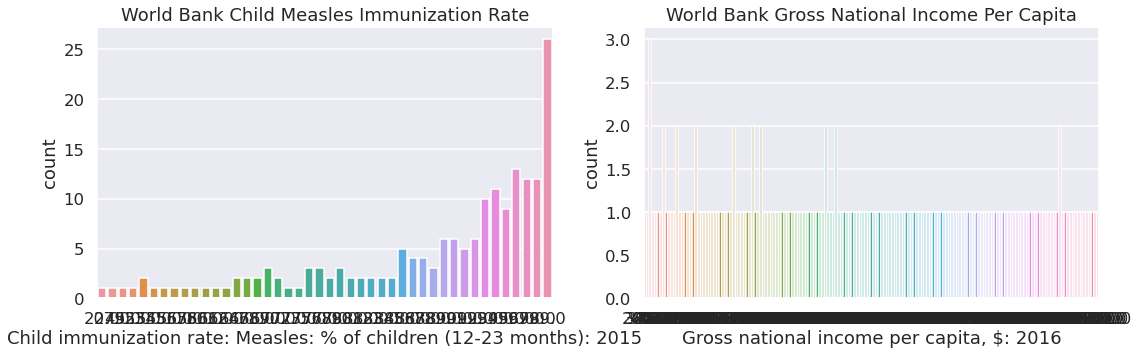

In [7]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.countplot(x = df['imm'])
plt.xlabel("Child immunization rate: Measles: % of children (12-23 months): 2015")
plt.title('World Bank Child Measles Immunization Rate')

plt.subplot(1,2,2)
sns.countplot(x = df['inc'])
plt.xlabel('Gross national income per capita, $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

In the cell below, explain why `countplot` is NOT the right tool for visualizing the distribution of our data.

<!--
BEGIN QUESTION
name: q1a
-->

_Type your answer here, replacing this text._

## Question 1b

In the cell below, create a plot of immunization rate and income per capita using the [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function. As above, you should have two subplots, where the left subplot is immunization, and the right subplot is income. When you call `histplot`, set the `kde` parameter to false.

Don't forget to title the plot and label axes!

**Hint:** *Copy and paste from above to start.*

<!--
BEGIN QUESTION
name: q1b1
-->

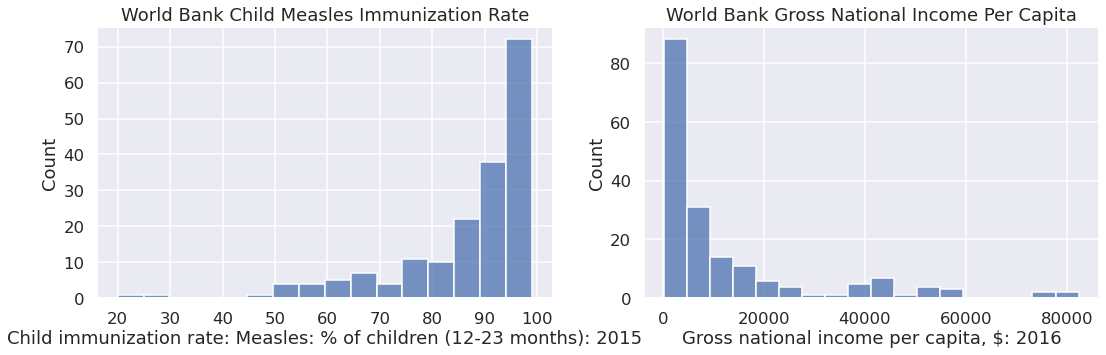

In [16]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(data=df, x='imm',kde=False)
plt.xlabel('Child immunization rate: Measles: % of children (12-23 months): 2015')
plt.title('World Bank Child Measles Immunization Rate')

plt.subplot(1,2,2)
sns.histplot(data=df, x='inc', kde=False)
plt.xlabel('Gross national income per capita, $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.show()

You should see histograms that show the counts of how many data points appear in each bin. `histplot` uses a heuristic called the Freedman-Diaconis rule to automatically identify the best bin sizes, though it is possible to set the bins yourself (we won't).


In the cell below, we will explore adding a `rugplot` to the each plot. Note how the result of first call to `sns.histplot` is assigned to an `ax` object, which then gets passed in to the call to `rugplot`. This ensures that the `rugplot` and `histplot` occupy the same space.

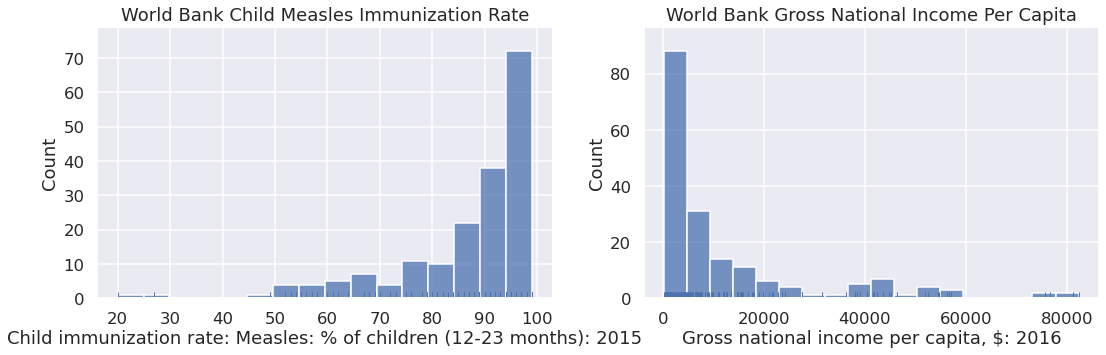

In [17]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
ax1 = sns.histplot(df['imm'], kde=False)
sns.rugplot(df['imm'], ax = ax1)
plt.xlabel("Child immunization rate: Measles: % of children (12-23 months): 2015")
plt.title('World Bank Child Measles Immunization Rate')
plt.ylabel('Count')

plt.subplot(1,2,2)
ax2 = sns.histplot(df['inc'], kde=False)
sns.rugplot(df['inc'], ax = ax2)
plt.xlabel('Gross national income per capita, $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.ylabel('Count')
plt.show()

Above, you should see little lines at the bottom of the plot showing the actual data points. In the cell below, we will see what happens when we further set the `kde` parameter to True.

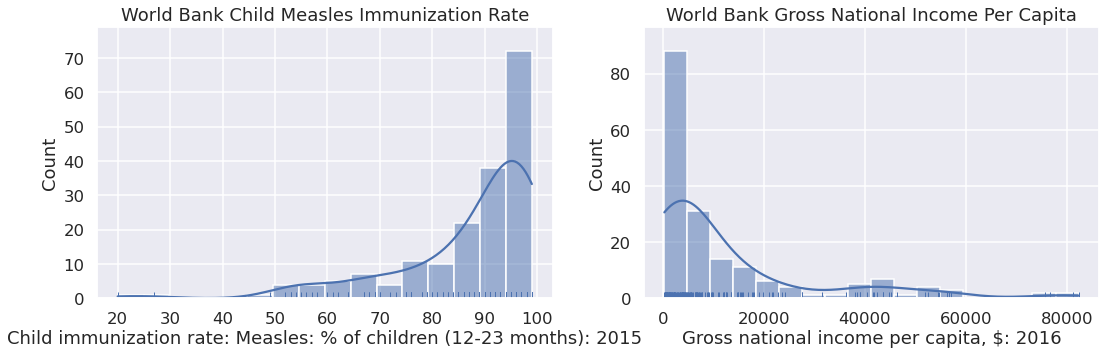

In [18]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
ax1 = sns.histplot(df['imm'], kde=True)
sns.rugplot(df['imm'], ax = ax1)
plt.xlabel("Child immunization rate: Measles: % of children (12-23 months): 2015")
plt.title('World Bank Child Measles Immunization Rate')
plt.ylabel('Count')

plt.subplot(1,2,2)
ax2 = sns.histplot(df['inc'], kde=True)
sns.rugplot(df['inc'], ax = ax2)
plt.xlabel('Gross national income per capita, $: 2016')
plt.title('World Bank Gross National Income Per Capita')
plt.ylabel('Count')
plt.show()

You should see roughly the same histogram as before. However, now you should see an overlaid smooth line. This is the kernel density estimate discussed in class. 

Observations:
* The KDE is just an estimate, as is the histogram. Notice that it assigns a large fraction of its area to values in the 100-120% literacy rate. This is definitely an impossibility.

We'll talk a bit about KDEs in this lab, but you'll learn more in this Thursday's lecture.

## Question 1c

Looking at the income data, it is difficult to see the distribution among low income countries because they are all scrunched up at the left side of the plot. The KDE also has a problem where the density function has a lot of area below 0. 

Transforming the `inc` data logarithmically gives us a more symmetric distribution of values. This can make it easier to see patterns.

In addition, summary statistics like the mean and standard deviation (square-root of the variance) are more stable with symmetric distributions.

In the cell below, make a distribution plot of `inc` with the data transformed using `np.log10` and `kde=True`. If you want to see a KDE, just set `kde=True`. If you don't specify the `kde` parameter, it is by default set to False. 

<!--
BEGIN QUESTION
name: q1c
-->

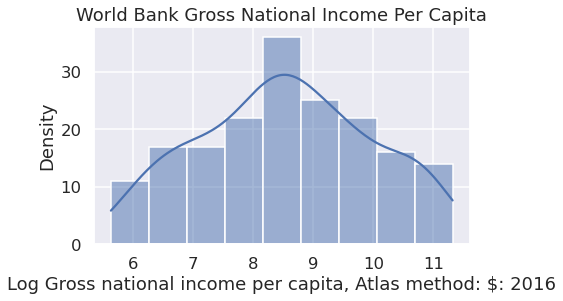

In [19]:
ax = sns.histplot(np.log(df['inc']), kde=True)
plt.title('World Bank Gross National Income Per Capita')
plt.ylabel('Density')
plt.xlabel('Log Gross national income per capita, Atlas method: $: 2016');

When a distribution has a long right tail, a log-transformation often does a good job of symmetrizing the distribution, as it did here.  Long right tails are common with variables that have a lower limit on the values. 

On the other hand, long left tails are common with distributions of variables that have an upper limit, such as percentages (can't be higher than 100%) and GPAs (can't be higher than 4).  That is the case for the immunization rate. Typically taking a power-transformation such as squaring or cubing the values can help symmetrize the left skew distribution.

In the cell below, we will make a distribution plot of `imm` with the data transformed using a power, i.e., raise `imm` to the 2nd, 3rd, and 4th power. In the case of the immunization data, the left skew is so pronounced that we raise `imm` to the 6th power.


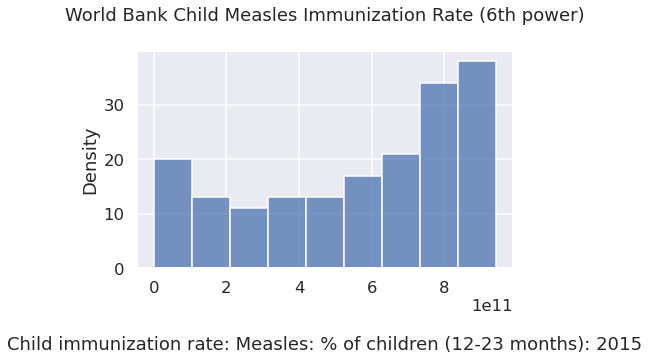

In [20]:
ax = sns.histplot((df['imm'])**6)
plt.ylabel('Density')
plt.xlabel("Child immunization rate: Measles: % of children (12-23 months): 2015", labelpad=40)
plt.title('World Bank Child Measles Immunization Rate (6th power)', pad=30);
# plt.figure(figsize=(12,8))

## Question 1d

If we want to examine the relationship between the measles immunization rate and the gross national income per capita, we need to make a scatter plot. 

In the cell below, create a scatter plot of untransformed income per capita and immunization rate using the `sns.scatterplot` function. Make  sure to label both axes using `plt.xlabel` and `plt.ylabel`.

<!--
BEGIN QUESTION
name: q1d
-->

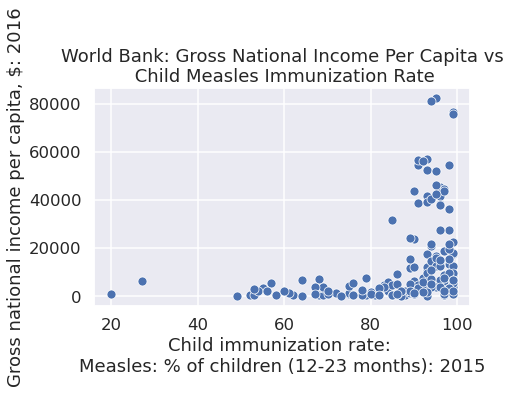

In [24]:
sns.scatterplot(data=df, x='imm',y='inc')
plt.xlabel("Child immunization rate: \nMeasles: % of children (12-23 months): 2015")
plt.ylabel('Gross national income per capita, $: 2016')
plt.title('World Bank: Gross National Income Per Capita vs\n Child Measles Immunization Rate');

We can better assess the relationship between two variables when they have been straightened because it is easier for us to recognize linearity.

In the cell below, we see a scatter plot of log-transformed income per capita against immunization rate.


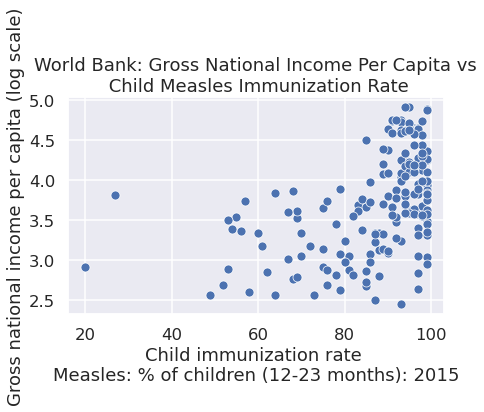

In [27]:
sns.scatterplot(x = df['imm'], y = np.log10(df['inc']))
plt.xlabel("Child immunization rate \nMeasles: % of children (12-23 months): 2015")
plt.ylabel('Gross national income per capita (log scale)')
plt.title('World Bank: Gross National Income Per Capita vs\n Child Measles Immunization Rate');

This scatter plot looks better. The relationship is closer to linear.

We can think of the log-linear relationship between x and y, as follows: a constant change in x corresponds to a percent (scaled) change in y.

We can also see that the long left tail of immunization rate is represented in this plot by a lot of the points being bunched up near 100. Try squaring immunization rate and taking the log of income. Does the plot look better? 

<!--
BEGIN QUESTION
name: q1d2
-->

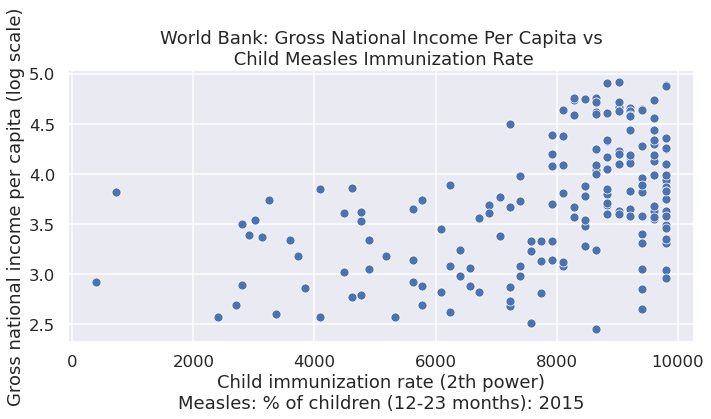

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['imm'] ** 2, y = np.log10(df['inc']))
plt.xlabel("Child immunization rate (2th power)\nMeasles: % of children (12-23 months): 2015")
plt.ylabel('Gross national income per capita (log scale)')
plt.title('World Bank: Gross National Income Per Capita vs\n Child Measles Immunization Rate');

Choosing the best transformation for a relationship is often a balance between keeping the model simple and straightening the scatter plot.

# SQL Setup

In [29]:
db_path = Path('data/imdbmini.db')

The following cell will connect to the above database using the SQL Alchemy library. This library is more general than the `sqlite3` module from the standard library because it can connect to several different database management systems, such as MySQL and PostgreSQL. It also supports an advanced feature for generating queries called an [object relational mapper](https://docs.sqlalchemy.org/en/latest/orm/tutorial.html) or ORM, which we won't discuss in this course but is quite useful for application development.

In [31]:
engine = sqlalchemy.create_engine(f"sqlite:///{db_path}")
connection = engine.connect()
inspector = sqlalchemy.inspect(engine)

To check that everything is working we will list the available tables.

In [32]:
inspector.get_table_names()

['Name', 'Rating', 'Role', 'Title']

# SQL Problems

The assignment consists of **2 SQL problems**: 1 required, and 1 optional. These questions use the same dataset that we've used for this week's homework.

**NOTE:** In order to run the autograder tests, you must not add any code blocks in after the block containing your solution, and the last line in the solution block must be `SELECT * FROM TableName;`.

<details>
    <summary>▶ [Click to Expand] <b>Dataset</b>: In this assignment, we will work with a miniature version of the <a href="https://www.imdb.com/interfaces/">IMDB Dataset</a>. There are 4 tables: <code>titles</code>, <code>ratings</code>, <code>names</code>, <code>roles</code>. Click here to see description of 4 tables.</b></summary>

    
**`Name`** – Contains the following information for names (originally called `names.basic`)
- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for
    
    
**`Rating`** – Contains the IMDb rating and votes information for titles
- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received
    
    
**`Role`** – Contains the principal cast/crew for titles (originally called `principals`)
- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\\N'
- characters (string) - the name of the character played if applicable, else '\\N'
    
    
**`Title`** - Contains the following information for titles (originally called `title.basics`):
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
- endYear (YYYY) – TV Series end year. '\\N' for all other title types
- runtimeMinutes – primary runtime of the title, in minutes
- genres (string array) – includes up to three genres associated with the title
</details>

In [44]:
query = """
SELECT *
FROM Role
LIMIT 3
"""
pd.read_sql(query, engine)

,index,tconst,ordering,nconst,category,job,characters
0,0,417,1,617588,actor,None,"[""Prof. Barbenfouillis"",""The Moon""]"
1,1,417,2,29244,actor,None,"[""Astronomer""]"
2,2,417,3,76933,actress,None,"[""Lady in the Moon""]"


## Question 2: Find 10 films with the most votes.

- Output the film title `title` and the number of votes `numVotes`

<!--
BEGIN QUESTION
name: q2
-->

In [40]:
query_q2 = """
SELECT
    c1.primaryTitle AS title,
    c2.numVotes
FROM Title AS c1
JOIN Rating AS c2
    ON c1.tconst = c2.tconst
ORDER BY numVotes desc
LIMIT 10;
"""


res_q2 = pd.read_sql(query_q2, engine)
res_q2

,title,numVotes
0,Dan in Real Life,99965
1,U.S. Marshals,99948
2,Tom Clancy's Jack Ryan,99948
3,Alice Through the Looking Glass,99870
4,The Cloverfield Paradox,99856
5,Fast Times at Ridgemont High,99835
6,The Man with the Golden Gun,99712
7,Extremely Loud & Incredibly Close,99698
8,The Last Witch Hunter,99531
9,The Cell,99513


In [41]:
grader.check("q2")

q2 results: All test cases passed!

##  [OPTIONAL] Question 3: Find 10 actors/actresses in the most movies.

- Output the actor/actress `name` and the number of films per actor/actress `total`.
- Sort by number of films in descending order.

<details>
    <summary>▶ [Click to Expand] <b>Hints</b></summary>
    
- **Hint**: Read one tip at a time. Break down the question into parts: (1) Link actors/actresses to films. (2) Keep only **movies**. Keep only **actors/actresses**. (3) Count movies per actor/actress.
    
- **Hint**: Part 1 - Actors and actresses are in `Name` and films are in `Title`. How do we connect them? See 9.3 https://youtu.be/vGgKqxUPX7A to understand how the "junction table" `Role` is important.
    
- **Hint**: Part 2 - See which roles people play in movies using `SELECT DISTINCT category FROM Role`. You will need to keep only actors/actresses.
    
- **Hint**: You can assume each actor/actress only has one role per film. If you're not sure how this hint affects your answer, don't worry about it.
</details>

<!--
BEGIN QUESTION
name: q3
-->

In [63]:
query_q3 = """
SELECT
     c1.primaryName AS name,
     COUNT(DISTINCT c3.tconst) AS total
FROM Name AS c1
JOIN Role AS c2
    ON c1.nconst = c2.nconst
JOIN Title AS c3
    ON c2.tconst = c3.tconst
WHERE c2.category = 'actor' OR c2.category = 'actress'
GROUP BY name
ORDER BY total desc
LIMIT 10;
"""


res_q3 = pd.read_sql(query_q3, engine)
res_q3

,name,total
0,Lena Headey,69
1,Peter Dinklage,68
2,Robert De Niro,65
3,Nikolaj Coster-Waldau,61
4,Samuel L. Jackson,56
5,Emilia Clarke,54
6,Nicolas Cage,53
7,Bruce Willis,49
8,Tom Hanks,47
9,Bryan Cranston,44


In [64]:
grader.check("q3")

q3 results:
    q3 - 1 result:
        Trying:
            all(res_q3["name"] == ['Robert De Niro', 'Samuel L. Jackson', 'Nicolas Cage', 'Bruce Willis', 'Tom Hanks', 'Johnny Depp', 'Mark Wahlberg', 'Morgan Freeman', 'Liam Neeson', 'Sylvester Stallone'])
        Expecting:
            True
        **********************************************************************
        Line 1, in q3 0
        Failed example:
            all(res_q3["name"] == ['Robert De Niro', 'Samuel L. Jackson', 'Nicolas Cage', 'Bruce Willis', 'Tom Hanks', 'Johnny Depp', 'Mark Wahlberg', 'Morgan Freeman', 'Liam Neeson', 'Sylvester Stallone'])
        Expected:
            True
        Got:
            False

    q3 - 2 result:
        Trying:
            all(res_q3["total"] == [64, 54, 53, 49, 46, 43, 41, 40, 40, 39])
        Expecting:
            True
        **********************************************************************
        Line 1, in q3 1
        Failed example:
            all(res_q3["total"] == [64, 54, 53, 49, 46, 43, 41, 40, 40, 39])
        Expected:
            True
        Got:
            False

**Congrats!** You are finished with this assignment.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [65]:
grader.check_all()

q2 results: All test cases passed!

q3 results:
    q3 - 1 result:
        Trying:
            all(res_q3["name"] == ['Robert De Niro', 'Samuel L. Jackson', 'Nicolas Cage', 'Bruce Willis', 'Tom Hanks', 'Johnny Depp', 'Mark Wahlberg', 'Morgan Freeman', 'Liam Neeson', 'Sylvester Stallone'])
        Expecting:
            True
        **********************************************************************
        Line 1, in q3 0
        Failed example:
            all(res_q3["name"] == ['Robert De Niro', 'Samuel L. Jackson', 'Nicolas Cage', 'Bruce Willis', 'Tom Hanks', 'Johnny Depp', 'Mark Wahlberg', 'Morgan Freeman', 'Liam Neeson', 'Sylvester Stallone'])
        Expected:
            True
        Got:
            False

    q3 - 2 result:
        Trying:
            all(res_q3["total"] == [64, 54, 53, 49, 46, 43, 41, 40, 40, 39])
        Expecting:
            True
        **********************************************************************
        Line 1, in q3 1
        Failed example

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)